<a href="https://colab.research.google.com/github/nik1806/Semantic-segmentation/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Load the data and organizing it 
root_dir = 'drive/My Drive/'
data_dir = root_dir + 'NN_pro_data'

In [ ]:
# change directory
# import os
# os.chdir(data_dir)
# !ls

gtFine_trainvaltest.zip


In [ ]:
# unzip data 
#!unzip gtFine_trainvaltest.zip

In [ ]:
# !ls

In [3]:
# Insert the directory - FOR importing user-defined modules/packages
import sys
sys.path.insert(0,'/content/drive/My Drive/Semantic-segmentation')

In [8]:
from dataset import cityscapes_train
from dataset import cityscapes_val
from torchvision import transforms
from torchvision.datasets import Cityscapes

In [7]:
transformation = transforms.Compose([
    #transforms.CenterCrop(100),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

# check if need of normalization

In [ ]:
# dst_train = cityscapes_train('cityscape', transform=transformation)
# dst_val = cityscapes_val('cityscape', transform=transformation)


In [9]:
dst_train = Cityscapes(data_dir, split='train', mode='fine', target_type='semantic', transforms=transformation)
dst_val = Cityscapes(data_dir, split='val', mode='fine', target_type='semantic', transforms=transformation)

RuntimeError: ignored

In [ ]:
length_train = len(dst_train)
length_val = len(dst_val)

In [ ]:
print(length_train)
print(length_val)

2975
500


In [ ]:
dst_train[1]

(tensor([[[0.1569, 0.2824, 0.3137,  ..., 0.9255, 0.8627, 0.6902],
          [0.1451, 0.1922, 0.2549,  ..., 0.7137, 0.4667, 0.3216],
          [0.1451, 0.2000, 0.3216,  ..., 0.3294, 0.2941, 0.2980],
          ...,
          [0.1647, 0.1608, 0.1608,  ..., 0.1686, 0.1686, 0.1647],
          [0.1569, 0.1569, 0.1569,  ..., 0.1686, 0.1686, 0.1647],
          [0.1529, 0.1529, 0.1569,  ..., 0.1686, 0.1686, 0.1647]],
 
         [[0.2118, 0.3608, 0.4078,  ..., 1.0000, 0.9529, 0.7882],
          [0.2000, 0.2471, 0.3137,  ..., 0.8157, 0.5569, 0.4039],
          [0.2000, 0.2627, 0.4039,  ..., 0.4118, 0.3804, 0.3882],
          ...,
          [0.2157, 0.2118, 0.2118,  ..., 0.2196, 0.2235, 0.2157],
          [0.2039, 0.2078, 0.2078,  ..., 0.2196, 0.2196, 0.2157],
          [0.2000, 0.2000, 0.2039,  ..., 0.2235, 0.2235, 0.2157]],
 
         [[0.1490, 0.2863, 0.3529,  ..., 0.9843, 0.9216, 0.7529],
          [0.1333, 0.1647, 0.2510,  ..., 0.7725, 0.5255, 0.3725],
          [0.1569, 0.1922, 0.3490,  ...,

torch.Size([1, 128, 128])


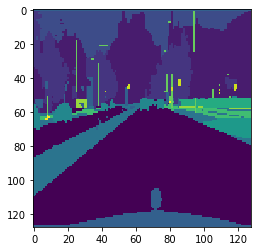

In [ ]:
from matplotlib import pyplot
pyplot.imshow(dst_train[1][1].data.numpy().transpose((1,2,0)).squeeze(2))
print(dst_train[1][1].shape)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 2
#Dataloaders
train_loader = DataLoader(dst_train, batch_size=1, shuffle=True)
val_loader = DataLoader(dst_val, batch_size=1,shuffle=True)

In [ ]:
dataiter = iter(train_loader)
#print(dataiter.next())
(images, labels) = dataiter.next()

dataiter_val = iter(val_loader)
(images_val, labels_val) = dataiter_val.next()

In [ ]:
from network1 import R2UNet

In [ ]:
import torch
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda")
model = R2UNet(in_channels=3,n_classes=34).to(device)

RuntimeError: cuda runtime error (999) : unknown error at /pytorch/aten/src/THC/THCGeneral.cpp:47

In [ ]:
from torch.optim import SGD, Adam, lr_scheduler

optimizer = Adam(model.parameters(), 5e-4, (0.9, 0.999),  eps=1e-08, weight_decay=1e-4) 


In [ ]:
loss_train = []
loss_val = []

for epoch in range(1):
    #Training
    model.train()
    running_loss = 0
    #images = dst[0:][0]
    #labels = dst[0:][1]
    for i, (images, labels) in enumerate(train_loader):
        inputs = images.to(device)
        labels = labels.to(device)
        labels = labels.squeeze(1)
        outputs = model(inputs)

        #print(labels.shape)
        #print(outputs.shape)

        
        optimizer.zero_grad()
        #loss = criterion(outputs,targets[:,0])
        #loss = criterion(outputs,labels[:,0].long())
        loss = criterion(outputs,labels.long())

        loss.backward()
        optimizer.step()

        ###accumulating loss for each batch
        #running_loss = loss.item()*inputs.size(0)
        running_loss += loss.item()

        #if i%10 == 0:
    #print("epoch{}, iter{}, loss: {}".format(epoch, i, loss.item()))
    loss_train.append(running_loss/len(train_loader))
    print("epoch{}, loss: {}".format(epoch, running_loss)

    #Validation
    model.eval()
    running_loss_val = 0
    for i, (images, labels) in enumerate(val_loader):
        inputs = images.to(device)
        labels = labels.to(device)
        labels = labels.squeeze(1)
             
        with torch.no_grad(): 
            outputs = model(inputs)
            loss = criterion(outputs,labels.long())


        ###accumulating loss for each batch
        running_loss_val += loss.item()

        #if i%10 == 0:
    loss_val.append(running_loss_val/len(val_loader))
    print("epoch{}, loss: {}".format(epoch, running_loss_val)


epoch0, iter0, loss: 9.64998034760356e-05
epoch0, iter10, loss: 9.49534005485475e-05
epoch0, iter20, loss: 0.00011086778249591589
epoch0, iter30, loss: 0.00010876869782805443
epoch0, iter40, loss: 0.00013484805822372437
epoch0, iter50, loss: 8.747319225221872e-05
epoch0, iter60, loss: 0.00013881956692785025
epoch0, iter70, loss: 0.00010735751129686832
epoch0, iter80, loss: 0.00010126829147338867
epoch0, iter90, loss: 0.00013012986164540052
epoch0, iter100, loss: 0.0001070423168130219
epoch0, iter110, loss: 0.00010182172991335392
epoch0, iter120, loss: 0.00010480787022970617
epoch0, iter130, loss: 0.00011405546683818102
epoch0, iter140, loss: 8.7750144302845e-05
epoch0, iter150, loss: 8.219055598601699e-05
epoch0, iter160, loss: 9.723438415676355e-05
epoch0, iter170, loss: 9.723578114062548e-05
epoch0, iter180, loss: 8.195685222744942e-05
epoch0, iter190, loss: 0.00010311603546142578
epoch0, iter200, loss: 0.00010032980935648084
epoch0, iter210, loss: 0.00010401906911283731
epoch0, iter

In [ ]:
x = [i for i in range(len(train_loader))]

pyplot.title("Plot showing training and validation loss against number of epochs")
pyplot.xlabel("Number of epochs")
pyplot.ylabel("Loss")
pyplot.plot(x, loss_train, color='r', label='training loss')
    
pyplot.legend()
pyplot.show()
pyplot.plot()

ValueError: x and y must have same first dimension, but have shapes (0,) and (2975,)